In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import ModelCheckpoint

import pickle

print "using ordering:", K.image_dim_ordering()

Using TensorFlow backend.


using ordering: tf


In [2]:
# load data from memory

import pickle

pickle_file = '-data.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    X = save['X']
    y = save['y']
    
    del save  # hint to help gc free up memory

In [3]:
# number of classes
num_classes = 4

# image dimensions
img_rows, img_cols = X.shape[1], X.shape[2]

if K.image_dim_ordering() == 'th':
    X = X.reshape(X.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

y = np_utils.to_categorical(y, num_classes)

print X.shape
print y.shape

(90948, 32, 32, 1)
(90948, 4)


(32, 32)


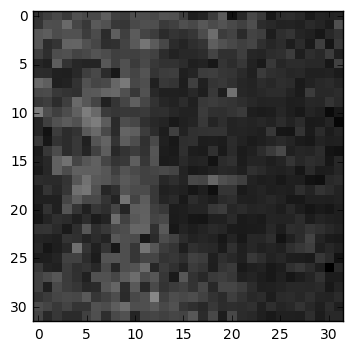

In [4]:
# preview one sample from the reloaded X dataset to make sure nothing happened along the way

%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

img_num = 1000

if K.image_dim_ordering() == 'th':
    img = X[img_num][0,:,:]
else:
    img = X[img_num][:,:,0]

print img.shape
imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')

In [5]:
# model hyperparameters
batch_size = 64
nb_epoch = 15

# network architecture
patch_size_1 = 3
patch_size_2 = 3
patch_size_3 = 3

depth_1 = 32
depth_2 = 64
depth_3 = 128

pool_size = 2

num_hidden_1 = 1000
num_hidden_2 = 1000

dropout = 0.5

In [6]:
model = Sequential()

model.add(Convolution2D(depth_1, patch_size_1, patch_size_1,
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(depth_2, patch_size_2, patch_size_2,
                        border_mode='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(depth_3, patch_size_3, patch_size_3,
                        border_mode='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())

model.add(Dense(num_hidden_1))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_hidden_2))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_classes))

model.add(Activation('softmax'))

In [7]:
checkpoint_name = "-model.hdf5"
checkpointer = ModelCheckpoint(checkpoint_name, verbose=0, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [8]:
history = model.fit(X, y, validation_split=0.25, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, callbacks=[checkpointer])

Train on 68211 samples, validate on 22737 samples
Epoch 1/15
68211/68211 [==============================] - 91s - loss: 0.5250 - acc: 0.8525 - val_loss: 0.5003 - val_acc: 0.8608
Epoch 2/15
68211/68211 [==============================] - 89s - loss: 0.4531 - acc: 0.8629 - val_loss: 0.4014 - val_acc: 0.8776
Epoch 3/15
68211/68211 [==============================] - 90s - loss: 0.3783 - acc: 0.8798 - val_loss: 0.3392 - val_acc: 0.8835
Epoch 4/15
68211/68211 [==============================] - 91s - loss: 0.2975 - acc: 0.9029 - val_loss: 0.2687 - val_acc: 0.9076
Epoch 5/15
68211/68211 [==============================] - 93s - loss: 0.2278 - acc: 0.9257 - val_loss: 0.1885 - val_acc: 0.9397
Epoch 6/15
68211/68211 [==============================] - 93s - loss: 0.1796 - acc: 0.9404 - val_loss: 0.1604 - val_acc: 0.9451
Epoch 7/15
68211/68211 [==============================] - 94s - loss: 0.1449 - acc: 0.9504 - val_loss: 0.1885 - val_acc: 0.9329
Epoch 8/15
68211/68211 [==============================